In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('Adult_Arrests.csv', low_memory=False)
df.head()

,TYPE,YEAR,DATE_,HOUR,CCN,ARREST_NUMBER,AGE,DEFENDANT_PSA,DEFENDANT_DISTRICT,RACE,...,ARREST_LONGITUDE,OFFENSE_LATITUDE,OFFENSE_LONGITUDE,GIS_ID,CREATOR,CREATED,EDITOR,EDITED,GLOBALID,OBJECTID
0,Adult Arrest,2013,2013/11/14 05:00:00+00,6,45bb932cb42f1bba872a8dfcfb2428a10d6fe0598a63f2...,1057043c3187ebc5c85920edbb441300e1446d3764e70f...,37,Out of State,Out of State,WHITE,...,NaN,NaN,NaN,ADULT_ARRESTS_1,NaN,NaN,JLAY,2024/05/30 22:52:10+00,{80CA3650-32C9-42C6-8412-9250D0E433BF},1
1,Adult Arrest,2013,2013/11/20 05:00:00+00,15,d558ea651a7b32e88571a453ccdf39376b2ec9dfb11f3c...,ad3f22534b1e2c409d66328bb4ac3904e9bacc768c6091...,39,602,6D,BLACK,...,NaN,NaN,NaN,ADULT_ARRESTS_2,NaN,NaN,JLAY,2024/05/30 22:52:10+00,{F1B2E42E-38B5-49D6-8A60-BF8CF0690A12},2
2,Adult Arrest,2013,2013/12/03 05:00:00+00,0,85451f87475b042563ddebc20b89b7258f07bca9b55b77...,a723e9f1d0b44a6e0cef81994b8e7d3d3da55270e6f871...,40,Out of State,Out of State,BLACK,...,NaN,NaN,NaN,ADULT_ARRESTS_3,NaN,NaN,JLAY,2024/05/30 22:52:10+00,{7F8BA37F-51F5-437F-A8F4-4B755385797B},3
3,Adult Arrest,2013,2013/12/05 05:00:00+00,21,3498c726acd19b8fc48c50a86c4e21e5823c41722cb779...,1a94d5a92f8538d3252aa65690ab70fac1a67646eb22ee...,65,502,5D,BLACK,...,NaN,NaN,NaN,ADULT_ARRESTS_4,NaN,NaN,JLAY,2024/05/30 22:52:10+00,{70B94138-C9F4-4CFF-9A72-12B071F3A78C},4
4,Adult Arrest,2013,2013/12/09 05:00:00+00,23,88e342ab716f545b67c467914d6999d514ec6ea34d5c2e...,5a0e432aaa38e011a7b8aa29de617d4e635acab29b3db5...,31,702,7D,BLACK,...,NaN,NaN,NaN,ADULT_ARRESTS_5,NaN,NaN,JLAY,2024/05/30 22:52:10+00,{2DCB5E7E-311F-48B8-A36B-BF1D6C2890F5},5


In [5]:
print(df.shape)   #print dimensions of dataset
print(df.columns) #print column names of dataset
print(df.isnull()) #check missing values

(275416, 33)
Index(['TYPE', 'YEAR', 'DATE_', 'HOUR', 'CCN', 'ARREST_NUMBER', 'AGE',
       'DEFENDANT_PSA', 'DEFENDANT_DISTRICT', 'RACE', 'ETHNICITY', 'SEX',
       'CATEGORY', 'DESCRIPTION', 'ARREST_PSA', 'ARREST_DISTRICT',
       'ARREST_BLOCKX', 'ARREST_BLOCKY', 'OFFENSE_BLOCKY', 'OFFENSE_BLOCKX',
       'OFFENSE_PSA', 'OFFENSE_DISTRICT', 'ARREST_LATITUDE',
       'ARREST_LONGITUDE', 'OFFENSE_LATITUDE', 'OFFENSE_LONGITUDE', 'GIS_ID',
       'CREATOR', 'CREATED', 'EDITOR', 'EDITED', 'GLOBALID', 'OBJECTID'],
      dtype='object')
         TYPE   YEAR  DATE_   HOUR    CCN  ARREST_NUMBER    AGE  \
0       False  False  False  False  False          False  False   
1       False  False  False  False  False          False  False   
2       False  False  False  False  False          False  False   
3       False  False  False  False  False          False  False   
4       False  False  False  False  False          False  False   
...       ...    ...    ...    ...    ...            ...    .

In [6]:
features =['TYPE', 'YEAR', 'DATE_', 'HOUR', 'CCN', 'ARREST_NUMBER', 'AGE',
       'DEFENDANT_PSA', 'DEFENDANT_DISTRICT', 'RACE', 'ETHNICITY', 'SEX',
       'CATEGORY', 'DESCRIPTION', 'ARREST_PSA', 'ARREST_DISTRICT',
       'ARREST_BLOCKX', 'ARREST_BLOCKY', 'OFFENSE_BLOCKY', 'OFFENSE_BLOCKX',
       'OFFENSE_PSA', 'OFFENSE_DISTRICT', 'ARREST_LATITUDE',
       'ARREST_LONGITUDE', 'OFFENSE_LATITUDE', 'OFFENSE_LONGITUDE', 'GIS_ID',
       'CREATOR', 'CREATED', 'EDITOR', 'EDITED', 'GLOBALID', 'OBJECTID' ]
for feature in features:
    null_check=pd.isnull(df[feature])   # Check if values in the column are NaN (missing)
    print(df[null_check])   # Print rows where the feature has missing values
    

Empty DataFrame
Columns: [TYPE, YEAR, DATE_, HOUR, CCN, ARREST_NUMBER, AGE, DEFENDANT_PSA, DEFENDANT_DISTRICT, RACE, ETHNICITY, SEX, CATEGORY, DESCRIPTION, ARREST_PSA, ARREST_DISTRICT, ARREST_BLOCKX, ARREST_BLOCKY, OFFENSE_BLOCKY, OFFENSE_BLOCKX, OFFENSE_PSA, OFFENSE_DISTRICT, ARREST_LATITUDE, ARREST_LONGITUDE, OFFENSE_LATITUDE, OFFENSE_LONGITUDE, GIS_ID, CREATOR, CREATED, EDITOR, EDITED, GLOBALID, OBJECTID]
Index: []

[0 rows x 33 columns]
Empty DataFrame
Columns: [TYPE, YEAR, DATE_, HOUR, CCN, ARREST_NUMBER, AGE, DEFENDANT_PSA, DEFENDANT_DISTRICT, RACE, ETHNICITY, SEX, CATEGORY, DESCRIPTION, ARREST_PSA, ARREST_DISTRICT, ARREST_BLOCKX, ARREST_BLOCKY, OFFENSE_BLOCKY, OFFENSE_BLOCKX, OFFENSE_PSA, OFFENSE_DISTRICT, ARREST_LATITUDE, ARREST_LONGITUDE, OFFENSE_LATITUDE, OFFENSE_LONGITUDE, GIS_ID, CREATOR, CREATED, EDITOR, EDITED, GLOBALID, OBJECTID]
Index: []

[0 rows x 33 columns]
Empty DataFrame
Columns: [TYPE, YEAR, DATE_, HOUR, CCN, ARREST_NUMBER, AGE, DEFENDANT_PSA, DEFENDANT_DISTRICT,

In [7]:
df=df.dropna() #drop the missing values
print(df.shape)

(41475, 33)


In [8]:
print(df.columns)


Index(['TYPE', 'YEAR', 'DATE_', 'HOUR', 'CCN', 'ARREST_NUMBER', 'AGE',
       'DEFENDANT_PSA', 'DEFENDANT_DISTRICT', 'RACE', 'ETHNICITY', 'SEX',
       'CATEGORY', 'DESCRIPTION', 'ARREST_PSA', 'ARREST_DISTRICT',
       'ARREST_BLOCKX', 'ARREST_BLOCKY', 'OFFENSE_BLOCKY', 'OFFENSE_BLOCKX',
       'OFFENSE_PSA', 'OFFENSE_DISTRICT', 'ARREST_LATITUDE',
       'ARREST_LONGITUDE', 'OFFENSE_LATITUDE', 'OFFENSE_LONGITUDE', 'GIS_ID',
       'CREATOR', 'CREATED', 'EDITOR', 'EDITED', 'GLOBALID', 'OBJECTID'],
      dtype='object')


### Categorical Data Classifiaction

In [9]:
df['RACE'].unique()

array(['BLACK', 'UNKNOWN', 'WHITE', 'ASIAN', 'MULTIPLE', 'OTHER'],
      dtype=object)

In [10]:
df['CATEGORY'].unique()

array(['Weapon Violations', 'Offenses Against Family & Children',
       'Driving/Boating While Intoxicated', 'Traffic Violations',
       'Prostitution', 'Release Violations/Fugitive', 'Simple Assault',
       'Assault with a Dangerous Weapon', 'Disorderly Conduct', 'Robbery',
       'Other Crimes', 'Damage to Property', 'Theft',
       'Assault on a Police Officer', 'Narcotics', 'Sex Offenses',
       'Theft from Auto', 'Property Crimes', 'Liquor Law Violations',
       'Aggravated Assault', 'Homicide', 'Burglary',
       'Motor Vehicle Theft', 'Sex Abuse', 'Gambling',
       'Vending Violations', 'Fraud and Financial Crimes', 'Arson',
       'Kidnapping', 'Release Violations/Fugitive (Warr)',
       'Release Violations/Fugitive (Fug)',
       'Fraud and Financial Crimes (Frau)',
       'Fraud and Financial Crimes (Forg)',
       'Fraud and Financial Crimes (Coun)', 'Release Violations'],
      dtype=object)

In [11]:
df_sex = df.groupby('SEX').size().reset_index(name='Numbers')
print(df_sex)

       SEX  Numbers
0   FEMALE     9886
1     MALE    31578
2  UNKNOWN       11


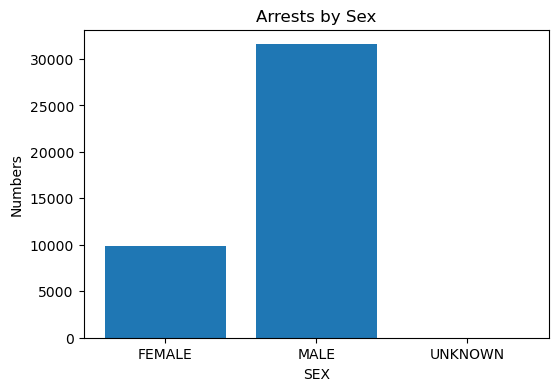

In [12]:
plt.figure(figsize=(6,4))
plt.xlabel('SEX')
plt.title("Arrests by Sex")
plt.ylabel('Numbers')
x=df_sex['SEX']
y=df_sex['Numbers']
plt.bar(x,y)
plt.show()

       RACE  Numbers
0     ASIAN      118
1     BLACK    37662
2  MULTIPLE       28
3     OTHER      224
4   UNKNOWN      759
5     WHITE     2684


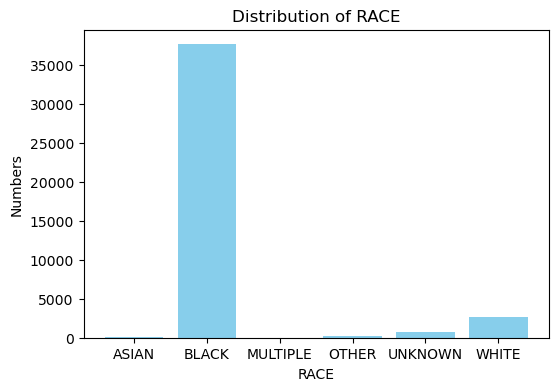

In [13]:
df_race = df.groupby('RACE').size().reset_index(name='Numbers')
print(df_race)

plt.figure(figsize=(6,4))
plt.xlabel('RACE')
plt.ylabel('Numbers')
x = df_race['RACE']
y = df_race['Numbers']
plt.bar(x, y, color='skyblue')
plt.title('Distribution of RACE')
plt.show()


                              CATEGORY  Numbers
0                   Aggravated Assault      271
1                                Arson       12
2          Assault on a Police Officer      831
3      Assault with a Dangerous Weapon     1474
4                             Burglary      325
5                   Damage to Property     1634
6                   Disorderly Conduct      258
7    Driving/Boating While Intoxicated     1567
8           Fraud and Financial Crimes       39
9    Fraud and Financial Crimes (Coun)        1
10   Fraud and Financial Crimes (Forg)        3
11   Fraud and Financial Crimes (Frau)       33
12                            Gambling       36
13                            Homicide      260
14                          Kidnapping       41
15               Liquor Law Violations      333
16                 Motor Vehicle Theft       75
17                           Narcotics     2118
18  Offenses Against Family & Children     1109
19                        Other Crimes  

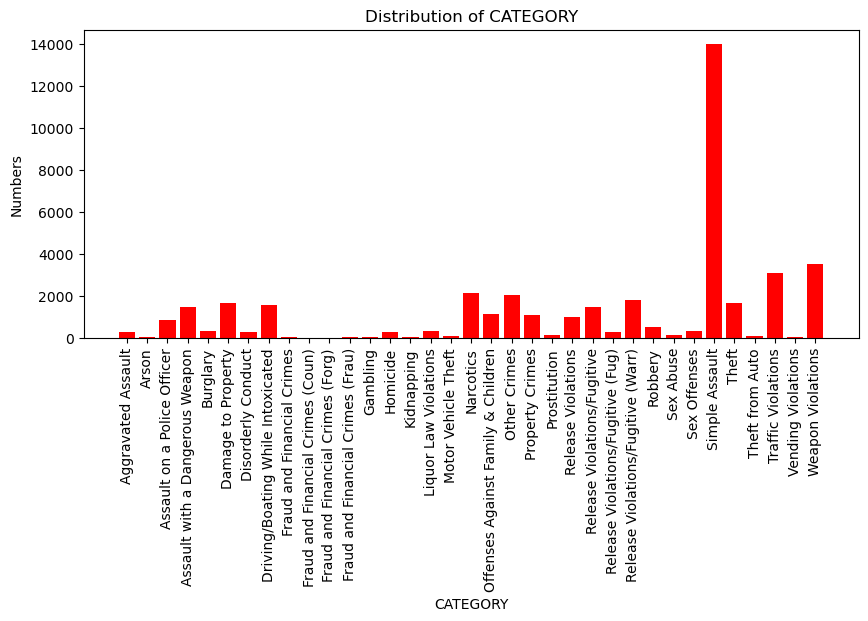

In [14]:
df_category = df.groupby('CATEGORY').size().reset_index(name='Numbers')
print(df_category)

plt.figure(figsize=(10,4))
plt.xlabel('CATEGORY')
plt.ylabel('Numbers')
x = df_category['CATEGORY']
y = df_category['Numbers']
plt.bar(x, y, color='red')
plt.xticks(rotation=90)
plt.title('Distribution of CATEGORY')
plt.show()


  ARREST_DISTRICT  Numbers
0              1D     5004
1              2D     2633
2              3D     4415
3              4D     4358
4              5D     6563
5              6D     9003
6              7D     9499


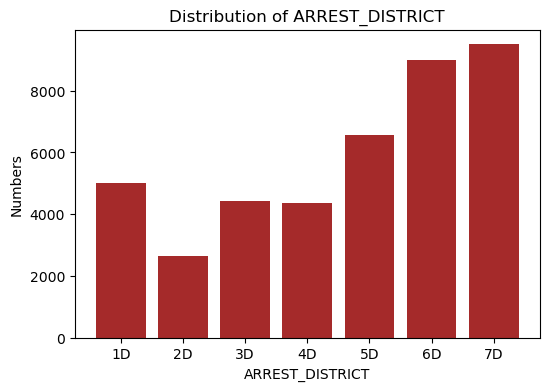

In [15]:
df_arrest_district = df.groupby('ARREST_DISTRICT').size().reset_index(name='Numbers')
print(df_arrest_district)

plt.figure(figsize=(6,4))
plt.xlabel('ARREST_DISTRICT')
plt.ylabel('Numbers')
x = df_arrest_district['ARREST_DISTRICT']
y = df_arrest_district['Numbers']
plt.bar(x, y, color='brown')
plt.title('Distribution of ARREST_DISTRICT')
plt.show()


In [16]:
df_ethnicity = df.groupby('ETHNICITY').size().reset_index(name='Numbers')
print(df_ethnicity)


      ETHNICITY  Numbers
0      HISPANIC     2105
1  NOT HISPANIC    29635
2       UNKNOWN     9735


In [17]:
df_description = df.groupby('DESCRIPTION').size().reset_index(name='Numbers')
print(df_description)

                                           DESCRIPTION  Numbers
0                                          *conspiracy        1
1    100 Kg/more Of Mixture Contain Marijuana Or 10...        1
2                       1st Degree Cruelty To Children       11
3    1st Degree Cruelty To Children (aggravated Ass...       13
4    1st Degree Cruelty To Children (family Offense...        2
..                                                 ...      ...
449            Welfare Fraud - Conspiracy Commit Crime        4
450              Welfare Fraud - Food Stamps Violation        3
451                                        While Armed       11
452  While Armed -  Additional Penalty For Committi...        1
453  Willfully Makes And Subscribes To A False Tax ...        1

[454 rows x 2 columns]


In [18]:
df_offense_district = df.groupby('OFFENSE_DISTRICT').size().reset_index(name='Numbers')
print(df_offense_district)

  OFFENSE_DISTRICT  Numbers
0               1D     5601
1               2D     2696
2               3D     4420
3               4D     4191
4               5D     6439
5               6D     8892
6               7D     9229
7              Unk        7


In [19]:
df_defendant_psa = df.groupby('DEFENDANT_PSA').size().reset_index(name='Numbers')
print(df_defendant_psa)

   DEFENDANT_PSA  Numbers
0            101      281
1            102      594
2            103      162
3            104      388
4            105      640
5            106      609
6            107      474
7            108      174
8            201       81
9            202       78
10           203      172
11           204      268
12           205       91
13           206       70
14           207      156
15           208      197
16           209      140
17           301      202
18           302      863
19           303      346
20           304      673
21           305      108
22           306      328
23           307      390
24           308      653
25           401      352
26           402      572
27           403      804
28           404      583
29           405      642
30           406      490
31           407      659
32           408      490
33           409      403
34           501      458
35           502      890
36           503      691
37          

In [20]:
df_arrest_psa = df.groupby('ARREST_PSA').size().reset_index(name='Numbers')
print(df_arrest_psa)

    ARREST_PSA  Numbers
0        101.0      659
1        102.0      798
2        103.0      223
3        104.0      505
4        105.0      861
5        106.0      826
6        107.0      989
7        108.0      143
8        201.0       71
9        202.0      130
10       203.0      291
11       204.0      336
12       205.0      110
13       206.0      254
14       207.0      522
15       208.0      564
16       209.0      355
17       301.0      451
18       302.0     1017
19       303.0      396
20       304.0      450
21       305.0      583
22       306.0      470
23       307.0      473
24       308.0      576
25       401.0      272
26       402.0      538
27       403.0      653
28       404.0      660
29       405.0      569
30       406.0      376
31       407.0      441
32       408.0      379
33       409.0      469
34       501.0      659
35       502.0      712
36       503.0      790
37       504.0      356
38       505.0      827
39       506.0     1348
40       507.0  

### Continuous Data Classification

In [21]:
df_age = df.groupby('AGE').size().reset_index(name='Numbers')
print(df_age)

    AGE  Numbers
0    18      944
1    19     1086
2    20     1211
3    21     1259
4    22     1238
..  ...      ...
66   85        2
67   86        2
68   88        1
69   92        1
70  121        1

[71 rows x 2 columns]


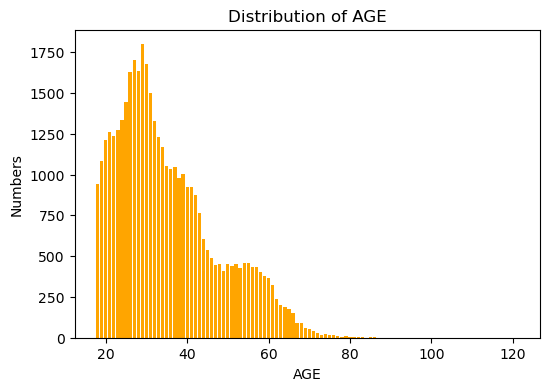

In [22]:
plt.figure(figsize=(6,4))
plt.xlabel('AGE')
plt.ylabel('Numbers')
x = df_age['AGE']
y = df_age['Numbers']
plt.bar(x, y, color='orange')
plt.title('Distribution of AGE')
plt.show()

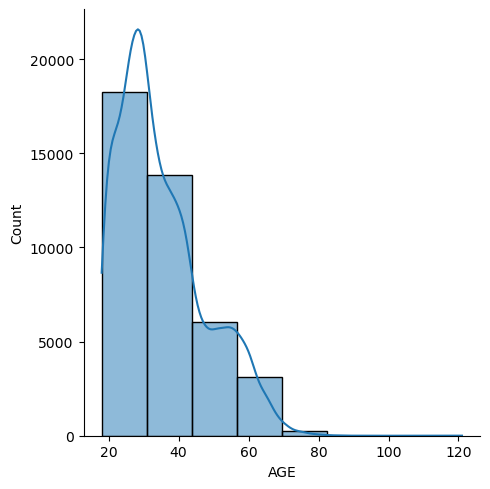

In [23]:
sns.displot(df['AGE'],kde= True, bins= 8)

In [24]:
min_age= df['AGE'].min()
max_age= df['AGE'].max()
print("Minimum Age:" , min_age)
print("Maximum Age:" , max_age)

Minimum Age: 18
Maximum Age: 121


### Detecting Anomalies

<Axes: ylabel='AGE'>

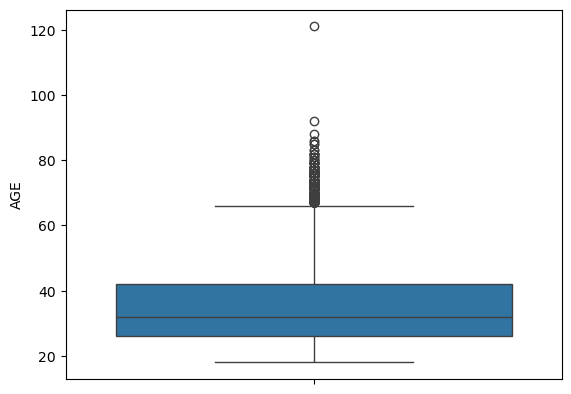

In [25]:
#the easiest way to detect anomalies is by using boxplots or whiskers
sns.boxplot(df['AGE'])


In [26]:
#Calculate the upper and lower limits
q1=df['AGE'].quantile(0.25)
q3=df['AGE'].quantile(0.75)
iqr=q3-q1
print(iqr)
lower=q1-1.5*iqr
upper=q3+1.5*iqr
print(lower)
print(upper)


16.0
2.0
66.0


In [27]:
#Create Boolean values to show outliers
upper_array=np.where(df['AGE']>= upper)[0]
lower_array=np.where(df['AGE']<= lower)[0]

#Eliminate Outliers
df.reset_index(drop=True, inplace=True)
df.drop(index = upper_array, inplace=True)
df.drop(index = lower_array, inplace=True)


In [28]:
df.shape

(40839, 33)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Drop non-numeric or irrelevant columns
features_to_use = ['AGE', 'SEX', 'RACE', 'ETHNICITY', 'ARREST_DISTRICT', 'ARREST_PSA']
df_model = df[features_to_use + ['CATEGORY']].copy()

# Encode categorical variables
le = LabelEncoder()
for col in features_to_use:
    if df_model[col].dtype == 'object':
        df_model[col] = le.fit_transform(df_model[col])

df_model['CATEGORY'] = le.fit_transform(df_model['CATEGORY'])

# Split data
X = df_model[features_to_use]
y = df_model['CATEGORY']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=300, max_depth=20,min_samples_split=5, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))




Accuracy Score: 0.2958700620306889


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Initialize the LabelEncoder
encoder = LabelEncoder()

# List of categorical columns 
categorical_columns = ['RACE', 'ETHNICITY', 'SEX'] 

# Apply LabelEncoder to categorical columns
for col in categorical_columns:
    df_no_outliers.loc[:, col] = encoder.fit_transform(df_no_outliers[col].astype(str))  # Convert to string before encoding

# Selecting numerical features for clustering
numerical_cols = ['ARREST_LONGITUDE', 'ARREST_LATITUDE', 'AGE']  


df_copy = df_no_outliers.copy()

# Perform clustering using KMeans
kmeans = KMeans(n_clusters=3, random_state=42)  
df_copy['cluster'] = kmeans.fit_predict(df_copy[numerical_cols])

# Calculate Silhouette Score
sil_score = silhouette_score(df_copy[numerical_cols], df_copy['cluster'])
print(f'Silhouette Score: {sil_score:.3f}')

# Plotting the clusters
plt.figure(figsize=(8, 6))

plt.scatter(df_copy['ARREST_LONGITUDE'], df_copy['ARREST_LATITUDE'], c=df_copy['cluster'], cmap='viridis', s=50, alpha=0.7)

# Marking the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroids')

plt.title('KMeans Clustering')
plt.xlabel('ARREST_LONGITUDE')
plt.ylabel('ARREST_LATITUDE')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

# Show the first few rows to verify
print(df_copy.head())



NameError: name 'df_no_outliers' is not defined